In [1]:
import ipyvuetify as v
import qgrid
import base64
import pandas as pd
import numpy as np
import time
import webbrowser

In [2]:
b = v.Btn(children=['Button'])
b2 = v.Btn(children = ['Apple'], flat=True)
b3 = v.Btn(icon = True, children = [v.Icon(children=['cloud_download'])])
b4 = v.Btn(icon = True, slot='activator', children = [v.Icon(children=['cloud_download'])])

In [3]:
b.block = False
b.loading = False

In [4]:
def clicked(widget, event, data):
    print(widget)
    print(event)
    print(data)

In [5]:
b.on_event('click', clicked)
b2.href = "https://www.apple.com"

In [6]:

df = pd.DataFrame(np.random.rand(1000,25))

In [7]:
csv = df.to_csv()
b64 = base64.b64encode(csv.encode())
payload = b64.decode()
href = f'data:text/csv;base64,{payload}'
b3.href = href

In [8]:
def send_to_excel(widget, event, data):
    widget.loading = True
    df.to_excel('/tmp/data.xlsx')
    url = 'file:///tmp/data.xlsx'
    webbrowser.open(url)
    time.sleep(2)
    widget.loading = False

b4.on_event('click', send_to_excel)

In [9]:
# wrap in a Layout, otherwise it fills the space
v.Layout(children=[
    b,
    b2,
    v.Tooltip(bottom=True, children=[
        b4,
        'Download Excel Sheet'
    ])
])

Layout(children=[Btn(block=False, children=['Button'], loading=False), Btn(children=['Apple'], flat=True, href…

In [10]:
v.Card(elevation=10, ripple=True, children=[b], dark=True, flat=False)

Card(children=[Btn(block=False, children=['Button'], loading=False)], dark=True, elevation=10.0, flat=False, r…

# bqplot

In [11]:
# add a bqplot
from bqplot import pyplot as plt
import numpy as np

In [12]:
plt.clear()
plt.figure(1, title='')
n = 200
x = np.linspace(0.0, 10.0, n)
y = np.cumsum(np.random.randn(n))
plt.plot(x, y)
plt.show(display_toolbar=False)

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

# seaborn plot

In [13]:
# add a seaborn plot, does it fill the card?
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#!pip install --upgrade seaborn

In [15]:
#sns.set(style="darkgrid")
sns.axes_style("darkgrid")
sns.set(rc={'figure.facecolor':'#EAEAF2'})

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")



In [16]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


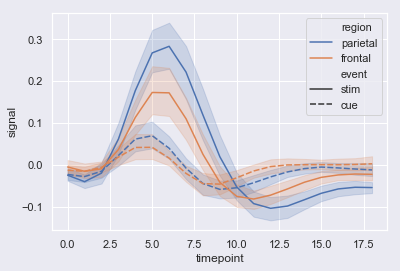

In [17]:
# Plot the responses for different events and regions
fig = sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)
plt.savefig('/tmp/output.jpg', format='jpg')

In [18]:
#v.Img(src ='https://picsum.photos/id/11/500/300' )
v.Img(src ="require('/tmp/output.jpg')")
#v.Img(src = 'https://en.wikipedia.org/wiki/Orange_(fruit)#/media/File:Orange-Whole-&-Split.jpg')

Img(src="require('/tmp/output.jpg')")

![](img src='file:///tmp/output.jpg')

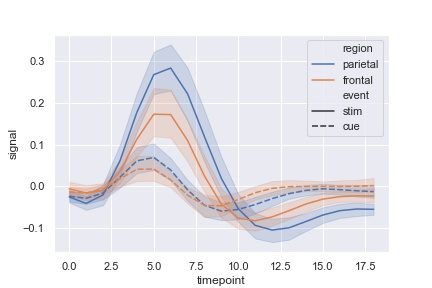

In [19]:
from IPython.display import Image
Image('/tmp/output.jpg')

<img src='file:///tmp/output.jpg'>

In [20]:
toggle_single = v.BtnToggle(v_model=2, class_='mr-3', children=[
    v.Btn(flat=True, children=[v.Icon(children=['format_align_left'])]),
    v.Btn(flat=True, children=[v.Icon(children=['format_align_center'])]),
    v.Btn(flat=True, children=[v.Icon(children=['format_align_right'])]),
    v.Btn(flat=True, children=[v.Icon(children=['format_align_justify'])]),
])
toggle_single

BtnToggle(children=[Btn(children=[Icon(children=['format_align_left'])], flat=True), Btn(children=[Icon(childr…

In [21]:
# add a v-data-table with filter and download buttons :-)

In [22]:
import ipyvuetify as v
from traitlets import (Unicode, List)
import pandas as pd

df = pd.DataFrame([['Tom', 10], ['Nick', 15], ['Juli', 14]], columns = ['Name', 'Age'])
df

class MyDataTable(v.VuetifyTemplate):
    headers = List([
        {'text': 'Name', 'sortable':  False, 'value': 'Name'},
        {'text': 'Age', 'value': 'Age', 'align': 'right'}
    ]).tag(sync=True)

    items = List(df.to_dict(orient='records')).tag(sync=True)

    template = Unicode('''
        <v-data-table
            :headers="headers"
            :items="items"
            class="elevation-1"
        >
            <template v-slot:items="props">
                <td>{{ props.item.Name }}</td>
                <td class="text-xs-right">{{ props.item.Age }}</td>
            </template>
        </v-data-table>
    ''').tag(sync=True)

MyDataTable()

MyDataTable(headers=[{'text': 'Name', 'sortable': False, 'value': 'Name'}, {'text': 'Age', 'value': 'Age', 'al…

In [23]:
??v.VuetifyTemplate

In [24]:
v.Html( children=[df.to_html()])

Html(children=['<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <t…

In [30]:
qw = qgrid.show_grid(df)

In [31]:
qw

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [92]:
class MyCard(v.VuetifyTemplate):
    my_text = "Hello Jonathan"
    
    template = Unicode('''
        <template>
  <v-layout>
    <v-flex xs12 sm6 offset-sm3>
      <v-card>
        <v-img
          src="https://cdn.vuetifyjs.com/images/cards/desert.jpg"
          aspect-ratio="2.75"
        ></v-img>

        <v-card-title primary-title>
          <div>
            <h3 class="headline mb-0">Kangaroo Valley Safari</h3>
            <div> '''+my_text+''' </div>
          </div>
        </v-card-title>

        <v-card-actions>
          <v-btn flat color="orange">Share</v-btn>
          <v-btn flat color="orange">Explore</v-btn>
        </v-card-actions>
      </v-card>
    </v-flex>
  </v-layout>
</template>
    ''').tag(sync=True)

MyCard()

MyCard()

In [97]:
lorum_ipsum = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.'

In [57]:
import bqplot
from bqplot import pyplot as plt
import numpy as np

n = 200

x = np.linspace(0.0, 10.0, n)
y = np.cumsum(np.random.randn(n)*10).astype(int)

fig = plt.figure( title='Histogram')
np.random.seed(0)
hist = plt.hist(y, bins=25)
hist.scales['sample'].min = float(y.min())
hist.scales['sample'].max = float(y.max())
fig.layout.width = 'auto'
fig.layout.height = 'auto'
fig.layout.min_height = '400px' # so it shows nicely in the notebook
fig

Figure(axes=[Axis(orientation='vertical', scale=LinearScale()), Axis(scale=LinearScale(max=161.0, min=-26.0))]…

In [28]:
v.Dialog(v_model=False, width='500', children=[
        v.Btn(slot="activator", color='success', dark=True, children=[
            "Open dialog"
        ]),
        v.Card(children=[
            v.CardTitle(class_='headline gray lighten-2', primary_title=True, children=[
                "Lorem ipsum"]),
            v.CardText(children=[
                qw ])#lorum_ipsum])
        ])
    ])

Dialog(children=[Btn(children=['Open dialog'], color='success', dark=True, slot='activator'), Card(children=[C…

In [92]:
vepc1 = v.ExpansionPanelContent(children=[
    v.Html(tag='div', slot='header', children=['item1']),
    v.Card(children=[
        v.CardText(children=[fig])])])

vepc2 = v.ExpansionPanelContent(children=[
    v.Html(tag='div', slot='header', children=['item2']),
    v.Card(children=[
        v.CardText(children=['Second Text'])])])

vep = v.ExpansionPanel(children=[vepc1, vepc2])
vl = v.Layout(children=[vep])
vl

TraitError: Element of the 'children' trait of a CardText instance must be a DOMWidget or a unicode string, but a value of <matplotlib.axes._subplots.AxesSubplot object at 0x1a220f6c50> <class 'matplotlib.axes._subplots.AxesSubplot'> was specified.

In [63]:
def on_click(widget, event, data):
   vnd.v_model = not vnd.v_model

drawer_button = v.Btn(color='primary', children=['Close drawer'])
drawer_button.on_event('click', on_click)

vnd = v.NavigationDrawer(v_model=False, absolute=True, right=True, children=[
    drawer_button
])

show_drawer = v.Btn(color='primary', children=['Toggle drawer'])
show_drawer.on_event('click', on_click)

v.Layout(children=[vnd, show_drawer])

Layout(children=[NavigationDrawer(absolute=True, children=[Btn(children=['Close drawer'], color='primary')], r…